In [10]:
!pip install git+https://github.com/ficstamas/FateML.git

  Cloning https://github.com/ficstamas/FateML.git to c:\users\ftkni\appdata\local\temp\pip-req-build-tigmtf_1
  Resolved https://github.com/ficstamas/FateML.git to commit 39e82ee436e6aff468145505419928fb7bdbd97b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fateml: filename=fateml-0.0.12-py3-none-any.whl size=9037 sha256=ca25796392b406943a8cc6dd151bf71e8b9fb0253ec4ce95aa3dce7c8642900e
  Stored in directory: C:\Users\ftkni\AppData\Local\Temp\pip-ephem-wheel-cache-jf9hymy0\wheels\87\6c\e2\33c99a760bb427c6cfafafdac061de3071a08d3bc865be1a8b
Successfully built fateml
  Attempting uninstall: fateml
    Found existing installation: fateml 0.0.11
    Uninstalling fateml-0.0.11:
      Successfull

  Running command git clone --filter=blob:none --quiet https://github.com/ficstamas/FateML.git 'C:\Users\ftkni\AppData\Local\Temp\pip-req-build-tigmtf_1'


In [94]:
!pip install graphviz imodels

     -------------------------------------- 195.0/195.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 9.5 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

In this notebook we are going use 2 datasets:
- [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) (Classification) 
  - Features: petal length (cm), petal width (cm), sepal length (cm), sepal width (cm)
  - Target: setosa (0), versicolor (1), virginica (2)
- [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) (Regression)
  - Features: age, sex, bmi, bp, s1 (total serum cholesterol), s2 (low-density lipoproteins), s3 (high-density lipoproteins \[HDL\]), s4 (total cholesterol / HDL), s5 (possibly log of serum triglycerides level), s6 (blood sugar level)
  - Target:  quantitative measure of disease progression one year after baseline

In [1]:
from fateml.data import load_dataset

iris = load_dataset("iris", standardize=False, statsmodels_format=False)
diabetes = load_dataset("diabetes", standardize=False, statsmodels_format=False)

In [82]:
iris.train_x

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
105,6.6,2.1,7.6,3.0
85,4.5,1.6,6.0,3.4
15,1.5,0.4,5.7,4.4
70,4.8,1.8,5.9,3.2
34,1.5,0.2,4.9,3.1
...,...,...,...,...
4,1.4,0.2,5.0,3.6
113,5.0,2.0,5.7,2.5
67,4.1,1.0,5.8,2.7
98,3.0,1.1,5.1,2.5


In [83]:
diabetes.train_x

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex
251,-0.052738,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084492,0.040343,0.050680
385,0.023546,-0.019140,0.049415,-0.063487,-0.061125,0.004460,-0.039493,-0.025953,-0.013504,0.050680
162,-0.052738,0.030440,-0.074527,-0.023584,-0.011335,-0.002903,-0.002592,-0.030748,-0.001078,-0.044642
231,0.009016,-0.030996,0.021872,0.008063,0.008707,0.004460,-0.002592,0.009434,0.011349,-0.044642
345,0.081666,-0.002973,-0.033213,0.042462,0.057871,-0.010266,0.034309,-0.000612,-0.001078,0.050680
...,...,...,...,...,...,...,...,...,...,...
404,-0.016412,0.054152,0.070072,-0.033216,-0.027931,0.008142,-0.039493,-0.027129,-0.009362,-0.044642
312,-0.074533,-0.023451,-0.005670,-0.020832,-0.014153,0.015505,-0.039493,-0.038460,-0.030072,-0.044642
433,-0.027310,-0.060097,-0.029770,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362,-0.044642
254,0.030811,0.056307,0.076958,0.049341,-0.012274,-0.036038,0.071210,0.120051,0.090049,0.050680


# Decision Trees

Linear and Logistic regression models are not suitable for scenarios when the features are interacting with eachother and/or a non-linear relationship is present between the target variable amd the features. In such case we can rely on decision trees. A decision tree is a flowchart-like structure in which an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

A dicision tree can handle non-linearity, categorical variables, missing data (not all of them, see CART below), and highly interpretable. Additionally, they don't require the data to be normalised or scaled. However decision trees have other issues. They are more prone to overfit the data (if the tree is too deep and complex) and less accurate overall.

<img src="https://github.com/ficstamas/FateML/raw/master/notebooks/images/tree-artificial-1.png" width="500">

## CART - Classification And Regression Trees

A popular decision tree algorithm. It can perform regression and classification tasks as well. The CART algorithm uses a top-down, greedy approach called recursive binary splitting to build the tree. It starts at the root node and selects the attribute that best splits the data into subsets with the most homogeneous class labels (in classification) or output values (in regression). The process is then repeated for each subset recursively, until a stopping criterion is met (e.g., maximum tree depth, minimum number of samples in a leaf node...). CART can only work on clean data, so we have to handle missing values beforehand.

- For classification problems, the Gini impurity is used as the criterion. Gini impurity measures the probability of a random sample being misclassified if it is randomly labeled according to the class distribution in the subset. The split that results in the lowest Gini impurity is chosen as the best split.

- For regression problems, the criterion used is the reduction in variance. The split that results in the largest reduction in variance is chosen as the best split.

In both cases, the algorithm will try all possible splits for all features and it will select the best split using the specified criterion. Once a split is chosen, the algorithm will recursively repeat the process for each subset of the data, until a stopping criterion is met.

It can be formulated as:
$$\hat{y}=\hat{f}(x)=\sum_{m=1}^Mc_mI_{\{x\in R_m\}},$$
where $I_{\{x\in R_m\}}$ is an indicator function which yields 1 if $x\in R_m$ and 0 otherwise. in other words if $x$ is part of node $m$ then it returns 1. Furthermore, $M$ denotes the number of all subsets and an instance ($x$) can only be in exactly one subset.


### Regression

In [84]:
from sklearn.tree import DecisionTreeRegressor

regression_tree = DecisionTreeRegressor(random_state=0, max_depth=3)
regression_tree.fit(diabetes.train_x, diabetes.train_y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [85]:
from sklearn.metrics import r2_score

r2_score(diabetes.test_y, regression_tree.predict(diabetes.test_x))

0.06595503286274407

#### Visualization

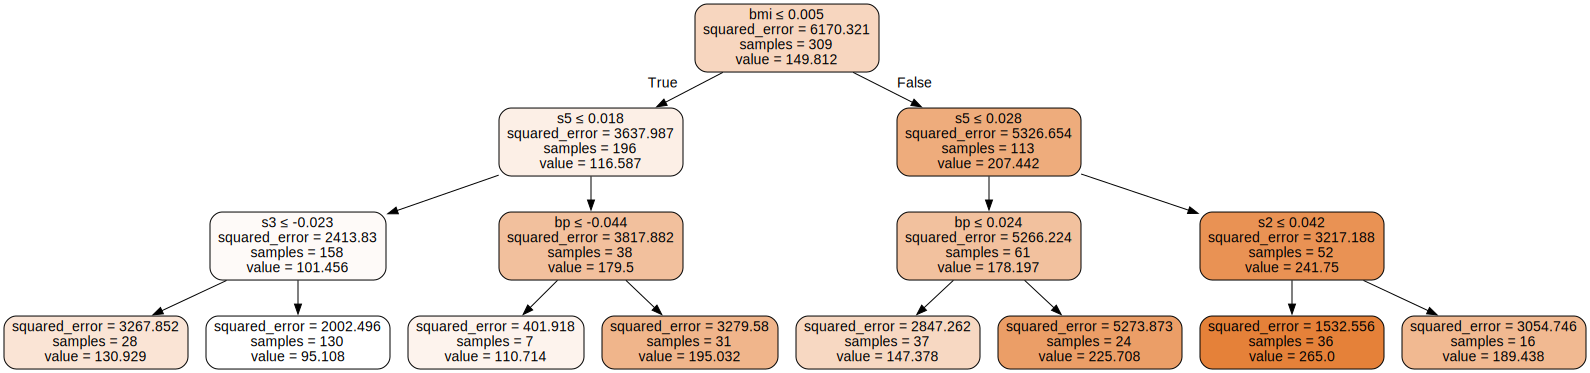

In [86]:
import graphviz
import sklearn.tree as tree

dot_data = tree.export_graphviz(regression_tree, out_file=None, feature_names=diabetes.train_x.columns, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Importance

In [87]:
regression_tree.feature_importances_

array([0.        , 0.53095453, 0.11658503, 0.        , 0.05675555,
       0.02652732, 0.        , 0.26917758, 0.        , 0.        ])

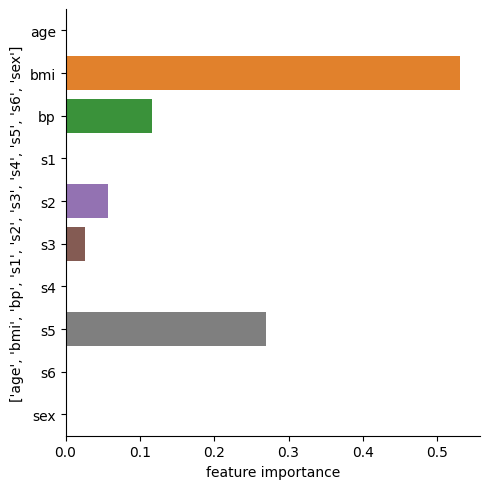

In [88]:
feature_importances = pd.DataFrame(data=regression_tree.feature_importances_, columns=["feature importance"], index=diabetes.train_x.columns)

sns.catplot(kind="bar", data=feature_importances, y=diabetes.train_x.columns.to_list(), x="feature importance", orient="h")

### Classification

In [89]:
from sklearn.tree import DecisionTreeClassifier

classification_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
classification_tree.fit(iris.train_x, iris.train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(iris.test_y, classification_tree.predict(iris.test_x))

1.0

#### Visualization

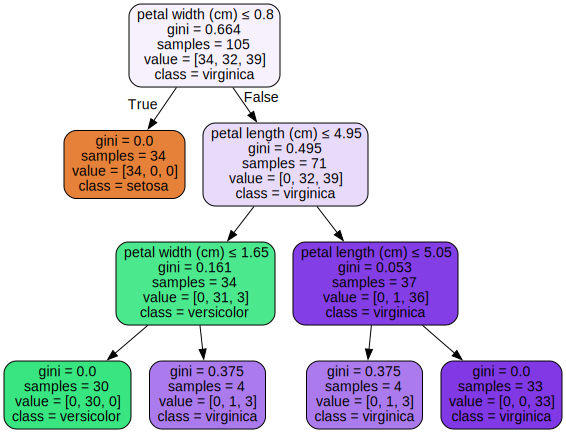

In [91]:
import graphviz
import sklearn.tree as tree

dot_data = tree.export_graphviz(classification_tree, out_file=None, feature_names=iris.train_x.columns, class_names=iris.features["target_names"], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Feature Importance

In [92]:
classification_tree.feature_importances_

array([0.42222226, 0.57777774, 0.        , 0.        ])

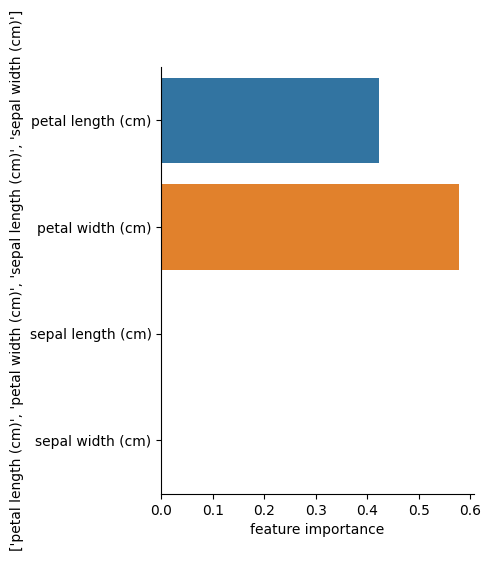

In [93]:
feature_importances = pd.DataFrame(data=classification_tree.feature_importances_, columns=["feature importance"], index=iris.train_x.columns)

sns.catplot(kind="bar", data=feature_importances, y=iris.train_x.columns.to_list(), x="feature importance", orient="h")

# Decision Rules

## OneR

One Rule (OneR) is a simple but surprisingly efficient classification algorithm. It works by iterating over each feature and creating a rule that uses the feature to predict the class label. The algorithm then selects the feature that results in the highest accuracy.

Outline of the algorithm is as follows:

0. Preprocessing: Discretize all continuous feature
1. Training: Iterate over each feature (columns):
   1. For each feature value, count the number times a label occures with that value.
   2. Regard the class label with the highest frequency (count) as the majority class.
   3. Record the error for each feature.
3. Evaluation: Select the feature with the least error and use the corresponting rule to classifi the examples

In [39]:
# X_train, y_train
from pandas.api.types import is_float_dtype

class OneR:
    def __init__(self):
        self.meta_ = {"feature": [], "error": [], "most frequent": [], "rules": []}
        self.best_feature_ = -1
        self.best_rules_ = []
        self.most_frequent_ = -1

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        for feature in X.columns:
            if is_float_dtype(X[feature]):
                # calculate quantiles
                discr = np.quantile(X[feature], [0.8, 0.6, 0.4, 0.2][::-1])
                discr = np.concatenate([[-np.inf], discr, [np.inf]])  # include infinity to the ranges
                categories = []
                # frequency table
                table = np.zeros([len(discr), len(y.unique())])
                # calculate label frequencies for each feature value
                for i in range(len(discr)-1):
                    lower = discr[i]
                    upper = discr[i+1]
                    categories.append([discr[i], discr[i+1]])

                    freq = y[(lower < X[feature]) & (X[feature] <= upper)].value_counts()
                    for j in freq.index:
                        table[i, j] = freq[j]

                table = table[:-1, :]  # remove padding
                # calculate meta information
                total = np.sum(table)
                self.meta_["most frequent"].append(np.argmax(table, axis=1))
                self.meta_["rules"].append(categories)

                # we are going to set the majority labels for each rule to 0
                # so we can calculate the error for each decision
                # num_miss_classified/total
                table[np.arange(len(table)), np.argmax(table, axis=1)] = 0
                error = np.sum(table)/total
                self.meta_["feature"].append(feature)
                self.meta_["error"].append(error)
                print(feature, error)
        min_idx = np.argmin(self.meta_["error"])
        self.best_feature_ = self.meta_["feature"][min_idx]
        self.best_rules_ = self.meta_["rules"][min_idx]
        self.most_frequent_ = self.meta_["most frequent"][min_idx]

    def predict(self, X):
        selected = X[self.best_feature_]
        predictions = np.zeros([len(X),])
        predictions[:] = -1
        for i, idx in enumerate(selected.index):
            value = selected[idx]
            for j, rule in enumerate(self.best_rules_):
                if rule[0] < value <= rule[1]:
                    predictions[i] = self.most_frequent_[j]
                    break
        return predictions

    def score(self, X, y):
        preds = self.predict(X)
        return len(np.where(y == preds)[0])/len(y)

In [40]:
oner = OneR()

oner.fit(iris.train_x, iris.train_y['target'])

petal length (cm) 0.14285714285714285
petal width (cm) 0.12380952380952381
sepal length (cm) 0.29523809523809524
sepal width (cm) 0.42857142857142855


In [42]:
oner.score(iris.test_x, iris.test_y['target'])

0.9

In [43]:
oner.best_feature_

'petal width (cm)'

In [44]:
oner.best_rules_

[[-inf, 0.2],
 [0.2, 1.1600000000000001],
 [1.1600000000000001, 1.5],
 [1.5, 2.0],
 [2.0, inf]]

In [47]:
import pprint

pprint.pprint(oner.meta_)

{'error': [0.14285714285714285,
           0.12380952380952381,
           0.29523809523809524,
           0.42857142857142855],
 'feature': ['petal length (cm)',
             'petal width (cm)',
             'sepal length (cm)',
             'sepal width (cm)'],
 'most frequent': [array([0, 0, 1, 2, 2], dtype=int64),
                   array([0, 0, 1, 2, 2], dtype=int64),
                   array([0, 1, 1, 2, 2], dtype=int64),
                   array([1, 2, 2, 0, 0], dtype=int64)],
 'rules': [[[-inf, 1.5],
            [1.5, 3.9],
            [3.9, 4.74],
            [4.74, 5.420000000000001],
            [5.420000000000001, inf]],
           [[-inf, 0.2],
            [0.2, 1.1600000000000001],
            [1.1600000000000001, 1.5],
            [1.5, 2.0],
            [2.0, inf]],
           [[-inf, 5.1], [5.1, 5.6], [5.6, 6.14], [6.14, 6.62], [6.62, inf]],
           [[-inf, 2.7], [2.7, 3.0], [3.0, 3.1], [3.1, 3.4], [3.4, inf]]]}


## Sequential Covering

TODO

<img src="https://github.com/ficstamas/FateML/raw/master/notebooks/images/sequential_covering.png" width=500>

In [79]:
# X_train, y_train
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

class SequentialCavering:
    def __init__(self):
        self.rules_ = {}
        self.feature_names_in_ = []
        self.learner_ = DecisionTreeClassifier(random_state=0)
        self.outlier_ = -1

    def _path(self, tree):
        children_left = tree.children_left
        children_right = tree.children_right
        feature = tree.feature
        threshold = tree.threshold
        impurity = tree.impurity

        rule = {}
        decision = None

        stack = [(0, 0)]
        while len(stack) > 0:
            node_id, depth = stack.pop()
            cl = children_left[node_id]
            cr = children_right[node_id]

            is_split_node = cl != cr
            if is_split_node:
                if impurity[cl] <= impurity[cr]:
                    rule[len(rule)] = {"leq": True,
                                       "feature": self.feature_names_in_[feature[node_id]],
                                       "threshold": threshold[node_id]}
                    stack.append((cl, depth+1))
                else:
                    rule[len(rule)] = {"leq": False,
                                       "feature": self.feature_names_in_[feature[node_id]],
                                       "threshold": threshold[node_id]}
                    stack.append((cr, depth+1))
            decision = np.argmax(tree.value[node_id])
        return rule, decision
            

    def _remove_covering(self, X, y):
        _X = X.copy()
        all_cond = []
        for _, rule_dict in self.rules_.items():
            rule_cond = []
            rule = rule_dict["rule"]
            for _, condition in rule.items():
                feature = condition["feature"]
                th = condition["threshold"]
                col = _X[feature]
                if condition["leq"]:
                    rule_cond.append(col <= th)
                else:
                    rule_cond.append(col > th)

            conditioned = rule_cond[0]
            for cond in rule_cond:
                conditioned = conditioned & cond
            all_cond.append(conditioned)

        conditioned = all_cond[0]
        for cond in all_cond:
            conditioned = conditioned | cond

        return _X.loc[~conditioned], y.loc[~conditioned]


    def fit(self, X, y, threshold=0.05):
        X = X.copy()
        y = y.copy()

        self.learner_ = self.learner_.fit(X, y)
        self.feature_names_in_ = self.learner_.feature_names_in_

        rule, label = self._path(self.learner_.tree_)
        quality = 2
        while quality > threshold:
            self.rules_[len(self.rules_)] = {"rule": rule, "label": label}
            if quality == 1.0:
                break
            X, y = self._remove_covering(X, y)

            self.learner_ = self.learner_.fit(X, y)
            rule, label = self._path(self.learner_.tree_)
            total = len(y)
            positive = len(np.where(y.values == 1)[0])
            quality = positive/total
        self.outlier_ = y.value_counts().idxmax()


    def predict(self, X):
        _X = X.copy()
        y_pred = np.zeros([len(X), ])
        for _, rule_dict in self.rules_.items():
            rule_cond = []
            rule = rule_dict["rule"]
            if len(rule) == 0:
                continue
            for _, condition in rule.items():
                feature = condition["feature"]
                th = condition["threshold"]
                col = _X[feature]
                if condition["leq"]:
                    rule_cond.append(col <= th)
                else:
                    rule_cond.append(col > th)

            conditioned = rule_cond[0]
            for cond in rule_cond:
                conditioned = conditioned & cond
            y_pred[conditioned.values] = rule_dict["label"]
        y_pred[y_pred == -1] = self.outlier_
        return y_pred
    

    def score(self, X, y):
        preds = self.predict(X)
        return len(np.where(y == preds)[0])/len(y)

    
    def print_rules(self):
        for _, rule in self.rules_.items():
            rule_str = []
            if len(rule['rule']) > 0:
                for _, cond in rule['rule'].items():
                    rule_str.append(f"{cond['feature']} {'<=' if cond['leq'] else '>'} {cond['threshold']:.2f}")
                rule_str = " AND ".join(rule_str)
            else:
                rule_str = "default"
            print(f"IF {rule_str} THEN {rule['label']}")

In [80]:
selected_class = 2
train_y_modified = (iris.train_y['target'] == selected_class).astype(int)
test_y_modified = (iris.test_y['target'] == selected_class).astype(int)

sq = SequentialCavering()
sq.fit(iris.train_x, train_y_modified)

print(sq.score(iris.test_x, test_y_modified))
sq.print_rules()

0.36666666666666664
IF petal length (cm) <= 4.85 AND petal width (cm) <= 1.65 THEN 0
IF petal length (cm) > 5.05 THEN 1
IF sepal width (cm) > 3.05 THEN 0
IF sepal length (cm) > 6.50 THEN 0
IF petal width (cm) > 1.60 THEN 1
IF sepal length (cm) <= 6.15 THEN 1


## Bayesian Rile Lists

In [125]:
from imodels import BayesianRuleListClassifier
from imodels.discretization import ExtraBasicDiscretizer

# the model only operates on binary classification task
selected_class = 1
target_name = iris.features['target_names'][selected_class]
train_y_modified = (iris.train_y['target'] == selected_class).astype(int)
test_y_modified = (iris.test_y['target'] == selected_class).astype(int)

# discretize dataset and fix the jank
disc = ExtraBasicDiscretizer(iris.train_x.columns, n_bins=3, strategy='uniform')
X_train_brl_df = disc.fit_transform(iris.train_x)
X_train_brl_df = X_train_brl_df.loc[:len(iris.train_x)-1]
X_train_brl_df.index = iris.train_x.index
X_train_brl_df

X_test_brl_df = disc.transform(iris.test_x)
X_test_brl_df = X_test_brl_df.loc[:len(iris.test_x)-1]
X_test_brl_df.index = iris.test_x.index
X_test_brl_df

# fir the model
bayesian_rule = BayesianRuleListClassifier(max_iter=3000, class1label=target_name, verbose=False, random_state=42)
bayesian_rule.fit(X_train_brl_df, train_y_modified, feature_names=X_train_brl_df.columns.tolist())

E:\Programs\Anaconda3\envs\FateML\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
E:\Programs\Anaconda3\envs\FateML\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trained RuleListClassifier for detecting versicolor
====================================================
IF petal length (cm)_4.966666666666667_to_6.9 > 0.5 THEN probability of versicolor: 5.1% (0.6%-13.8%)
ELSE IF petal width (cm)_0.1_to_0.8999999999999999 > 0.5 THEN probability of versicolor: 2.8% (0.1%-10.0%)
ELSE IF petal width (cm)_0.8999999999999999_to_1.7 > 0.5 THEN probability of versicolor: 96.9% (88.8%-99.9%)
ELSE probability of versicolor: 33.3% (5.3%-71.6%)
===================================================

In [131]:
def viz_classification_preds(probs, y_test):
    '''look at prediction breakdown
    '''
    from sklearn import metrics
    fig, axs = plt.subplots(1, 2)
    axs[0].hist(probs[:, 1][y_test==0], label='Class 0')
    axs[0].hist(probs[:, 1][y_test==1], label='Class 1', alpha=0.8)
    axs[0].set_ylabel('Count')
    axs[0].set_xlabel('Predicted probability of class 1')
    axs[0].legend()
    
    preds = np.argmax(probs, axis=1)
    axs[1].set_title('ROC curve')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
    axs[1].plot([0, 1], [0, 1],'r--')
    axs[1].set_xlabel('False positive rate')
    axs[1].set_ylabel('True positive rate')
    axs[1].plot(fpr, tpr)
    fig.tight_layout()

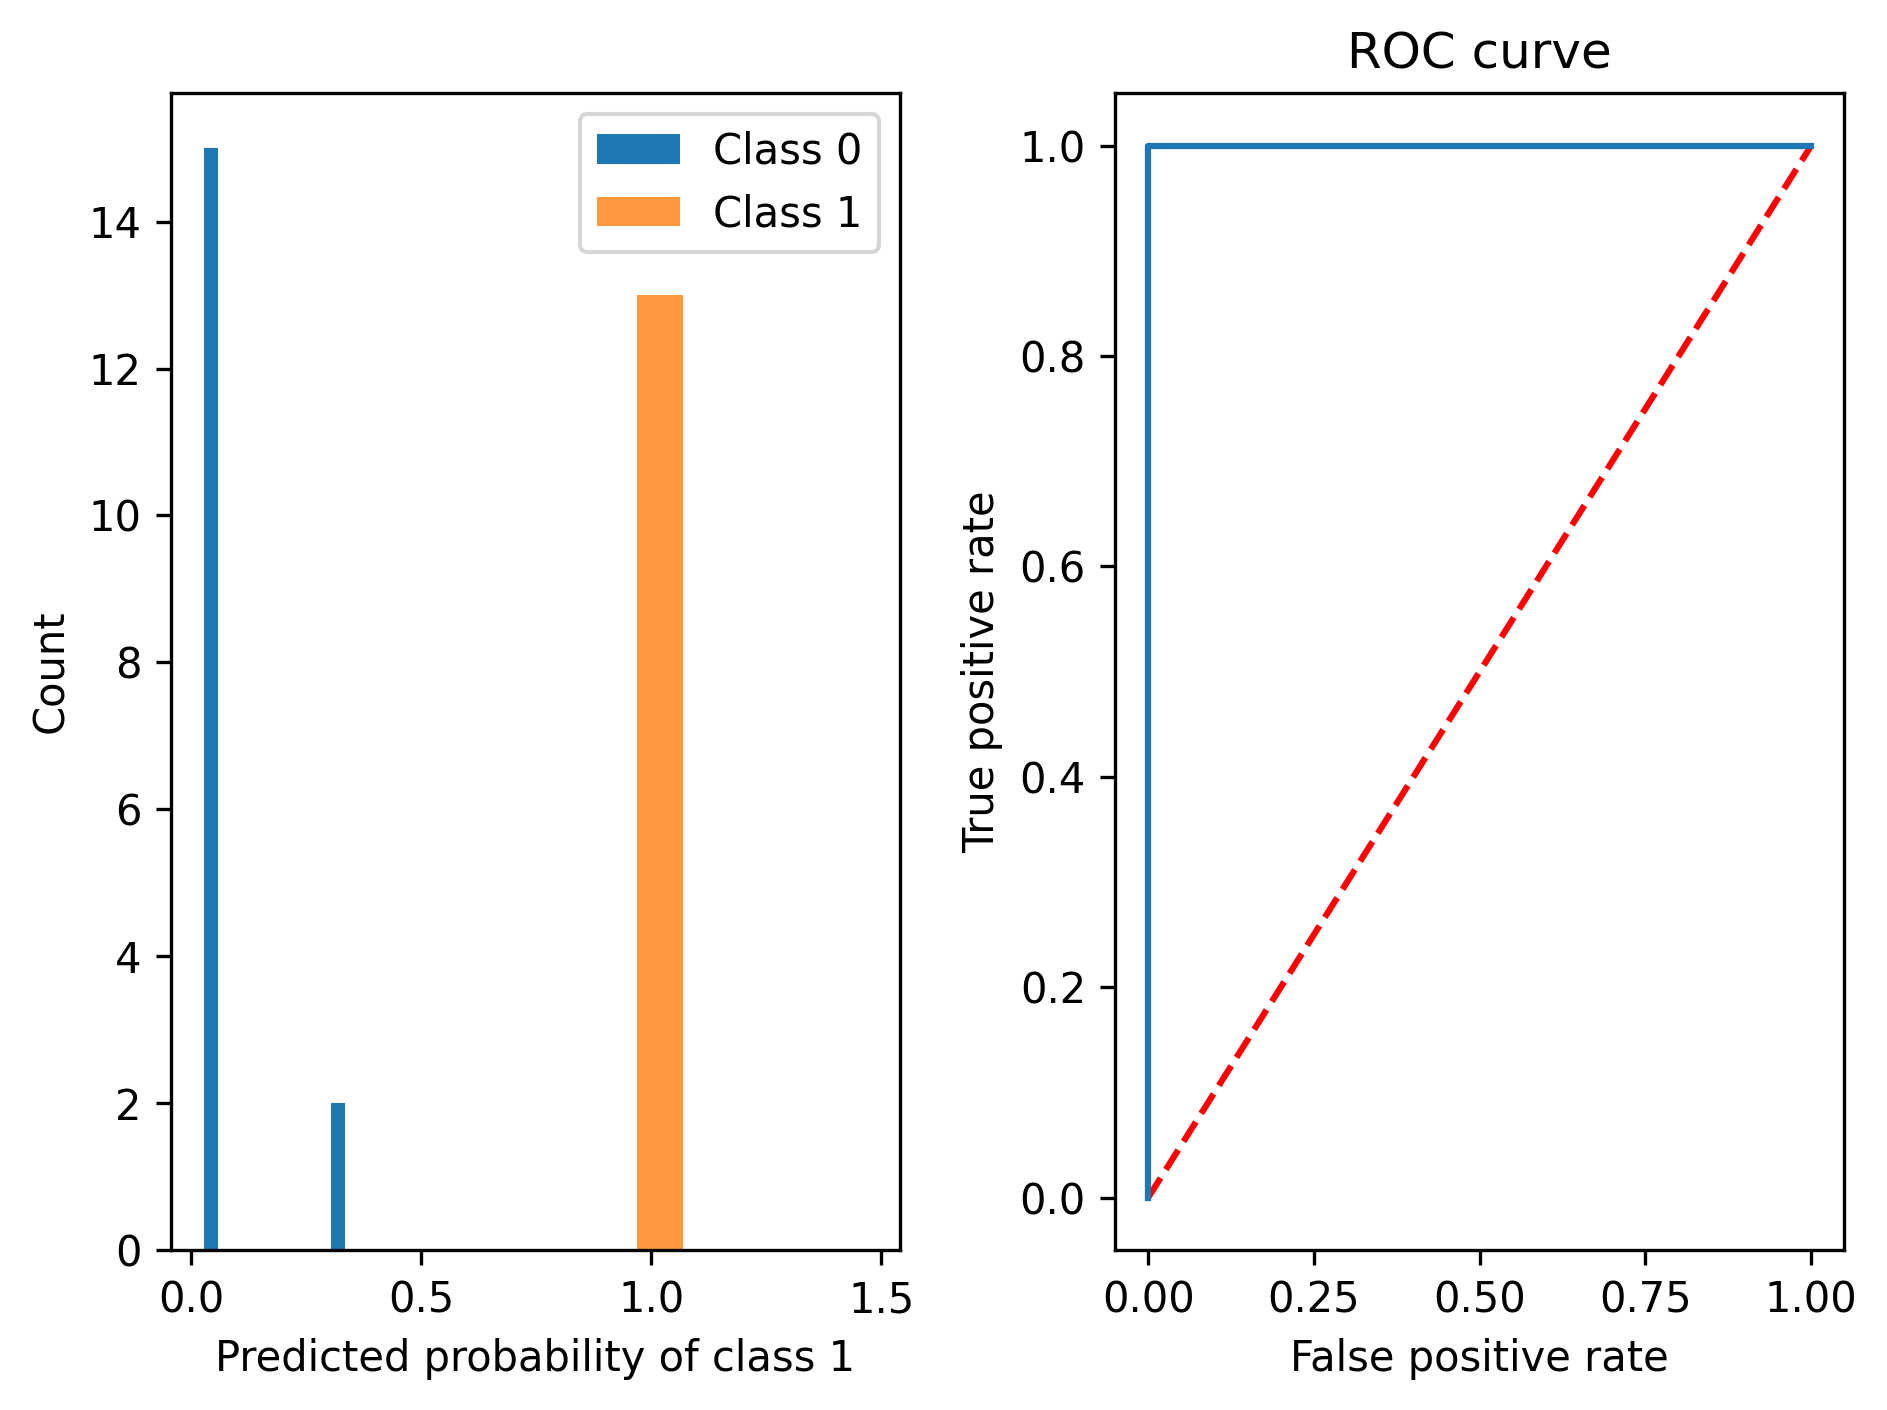

In [133]:
probs = bayesian_rule.predict_proba(X_test_brl_df)
viz_classification_preds(probs, test_y_modified)

## RuleFit

In [126]:
from imodels import RuleFitRegressor

rulefit = RuleFitRegressor(max_rules=10, random_state=0)
rulefit.fit(iris.train_x, iris.train_y, feature_names=iris.train_x.columns)

E:\Programs\Anaconda3\envs\FateML\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RuleFitRegressor(max_rules=10, random_state=0)

In [130]:
from sklearn import metrics

preds = rulefit.predict(iris.test_x)
print(f'test r2: {metrics.r2_score(iris.test_y, preds):0.3f}')

rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

# 'rule'
# 'coef' weight of the decision
# 'support' coverage
# 'importance' importance of the rule
rules.style.background_gradient(cmap='viridis')

test r2: 0.783


,rule,type,coef,support,importance
4,petal width (cm) <= 0.75,rule,-0.549813,0.323810,0.257273
5,petal length (cm) <= 4.85,rule,-0.311917,0.609524,0.152171
9,petal width (cm) <= 1.55,rule,-0.145908,0.619048,0.070856
8,petal width (cm) <= 1.45,rule,-0.112854,0.561905,0.055993
7,petal length (cm) <= 2.7,rule,-0.041842,0.323810,0.019579
6,petal length (cm) <= 4.95,rule,-0.033513,0.647619,0.016010
12,petal length (cm) > 4.8 and petal width (cm) > 0.7,rule,0.002171,0.390476,0.001059
11,petal width (cm) > 0.75,rule,0.000716,0.676190,0.000335
10,petal length (cm) <= 4.4,rule,-0.000002,0.523810,0.000001


# Other Popular Models

## Näive Bayes Classifier

## k-NN Classifier